# Маркетинговый анализ интернет-магазина. Приоритизация и проверка гипотез. 

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

**Цель работы — приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.**

Исследуемые данные - это информация о подготовленных гипотезах, о результатах А/В теста.

**После подготовки данных будет проведен анализ и приоритизация гипотез, в результате которого:**

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Узнаем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

**Для достижения поставленной цели исследования необходимо будет проанализировать A/B-тест, а именно:**

- Построить график кумулятивной выручки по группам. 
- Построить график кумулятивного среднего чека по группам. 
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. 
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Построить точечный график количества заказов по пользователям. 
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. 
- Построить точечный график стоимостей заказов. 
- Посчитать 95-й и 99-й перцентили стоимости заказов. 
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- **Принять решение по результатам теста.**

**Таким образом, исследование пройдёт в 4 этапа:**

[1. Обзор и предобработка данных](#stage_1)

[2. Приоритизация гипотез](#stage_2)

[3. Анализ A/B-теста](#stage_3)
- [Куммулятивные метрики](#stage_3_1)
- [Анализ выбросов](#stage_3_2)
- [Cтатистическая значимость различий](#stage_3_3)

[4. Выводы](#stage_4)

**Описание данных:**

Файл hypothesis.csv содержит 9 гипотез по увеличению выручки интернет-магазина, а orders.csv и visitors.csv описание результатов А/В теста. 

Структура hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Структура orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Структура visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


<a id='stage_1'></a>
## **Этап 1. Обзор и предобработка данных**

Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 30)
pd.set_option('max_colwidth', 120)
pd.set_option("display.float_format", "{:.2f}".format)

import warnings
warnings.filterwarnings('ignore')

Прочитаем датафреймы

In [2]:

hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')


Добавим функцию первого просмотра

In [3]:
def first_look(df):
    df.info()
    display(df.head())
    print('КОЛИЧЕСТВО ДУБЛИКАТОВ:', df.duplicated().sum())

In [4]:
first_look(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


In [5]:
first_look(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


In [6]:
first_look(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


Пропуски и явные дубликаты не обнаружены. После предпросмотра данных видим, что в фреймах hypothesis и orders названия столбцов необходимо привести к корректному виду. А так же в таблицах orders и visits столбцы с датой привести к формату date.

In [7]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

### Вывод
**На данном этапе мы изучили датафреймы hypothesis содержащий гипотезы по увеличению выручки интернет-магазина, orders и visitors содержащие описание результатов А/В теста.**
**Провели предобработку данных в ходе которой привели названия стобцов к корректоному виду и привели необходимые столбцы к формату даты.** 

<a id='stage_2'></a>
## **Этап 2. Приоритизация гипотез**

**Просмотрим гипотезы из датафрейма:**

1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
2. Запустить собственную службу доставки, что сократит срок доставки заказов
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
4. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
5. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
6. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
9. Запустить акцию, дающую скидку на товар в день рождения

Посчитаем ICE для гипотез в новом столбце, отсортируем по убыванию показателя ICE 

In [9]:
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] 
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


При использовании метода ICE наивысший приоритет получила **гипотеза 9 Запустить акцию, дающую скидку на товар в день рождения**, за счет высоких показателей влияния изменений на пользователя Impact и Confidence

Сразу же посчитаем RICE для гипотез в новом столбце, отсортируем по убыванию показателя RICE

In [10]:
hypothesis['RICE']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] 
hypothesis.sort_values(by='RICE', ascending=False) 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


При использовании метода RICE наивысший приоритет получила **гипотеза 8 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.**

### Вывод
**По результатам мы видим, что лидируют одни и те же 5 гипотез, а вот расстановка в зависимости от метода приоритизации изменилась. Очевидно, что в RICE дополнительное влияние оказывает параметр reach (скольких пользователей затронет изменение), и в таблицах это заметно - строки с высоким reach стали выше по списку.**
**Поскольку RICE учитывает охват пользователей, то его применение в нашем исследовании более желательно. Таким образом, приоритетной гипотезой, направленной на увеличение выручки примем гипотезу 8.**

<a id='stage_3'></a>
## **Этап 3. Анализ А/В теста**

Перед началом нализа А/В теста необходимо убедиться, что в исследовании нет пользователей, попавших в обе группы одновременно. 

In [11]:
# Выясним есть ли пользователи которые состоят в 2ух группах одновременно
two_group_id = orders.groupby(['visitor_id']).agg({'group':'nunique'}).reset_index()
two_group = two_group_id[two_group_id['group'] > 1]['visitor_id']
print('Пользователи которые состоят в 2ух группах одновременно', len(two_group))

Пользователи которые состоят в 2ух группах одновременно 58


**58 пользователей попали в обе группы. Неизвестно, какая из версий исследуемой страницы повлияла на их решения, значит, результаты исследования нельзя интерпретировать однозначно. Следует исключить этих пользователей из исследования.**

In [12]:
two_group_id_list = list(two_group_id[two_group_id.group != 1]['visitor_id'])
orders_new = orders.query('visitor_id not in @two_group_id_list')

In [13]:
# Проверим повторно есть ли пользователи в 2ух группах одновременно
two_group_id2 = orders_new.groupby(['visitor_id']).agg({'group':'nunique'}).reset_index()
two_group_2 = two_group_id2[two_group_id2['group'] > 1]['visitor_id']
print('Пользователи которые состоят в 2ух группах одновременно', len(two_group_2))

Пользователи которые состоят в 2ух группах одновременно 0


Посчитаем какую долю составляют пользователи попавшие сразу в две группы теста. 

In [14]:
# доля пользователей попавших сразу в две группы
print('{:.2%}'.format((len(orders)-len(orders_new)) / len(orders)))

15.12%


**58 пользователей попавших в обе группы одновременно составляют 15% от общей доли данных. Эта ошибка в сборе данных может стать значимой для дальнейшего исследования, поэтому окончательное решение об исключении этих пользователей из исследования остается неизменным.** 

In [15]:
#перезапишу код удаления, так как в дальнейшем исследовании использую переменную orders
orders = orders.query('visitor_id not in @two_group_id_list')

<a id='stage_3_1'></a>
### Куммулятивные метрики

In [16]:
# создаем массив уникальных пар значений дат и групп теста 
dates_groups=orders[['date', 'group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах  
orders_aggregated=dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]
.agg({'date':'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)\
.sort_values(by=['date', 'group']) 

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина  
visitors_aggregated=dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])] 
.agg({'date':'max', 'group' : 'max', 'visitors':'sum'}), axis=1)\
.sort_values(by=['date', 'group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия 
cumulative_data=orders_aggregated.merge(
    visitors_aggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']) 
cumulative_data.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### 3.1 Кумулятивная выручка по группам

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А 
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']] 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B 
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']] 

# объединим эти датафреймы
cum_total_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date')
cum_total_revenue.columns = ['date', 'revenue_a', 'orders_a', 'revenue_b', 'orders_b']
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


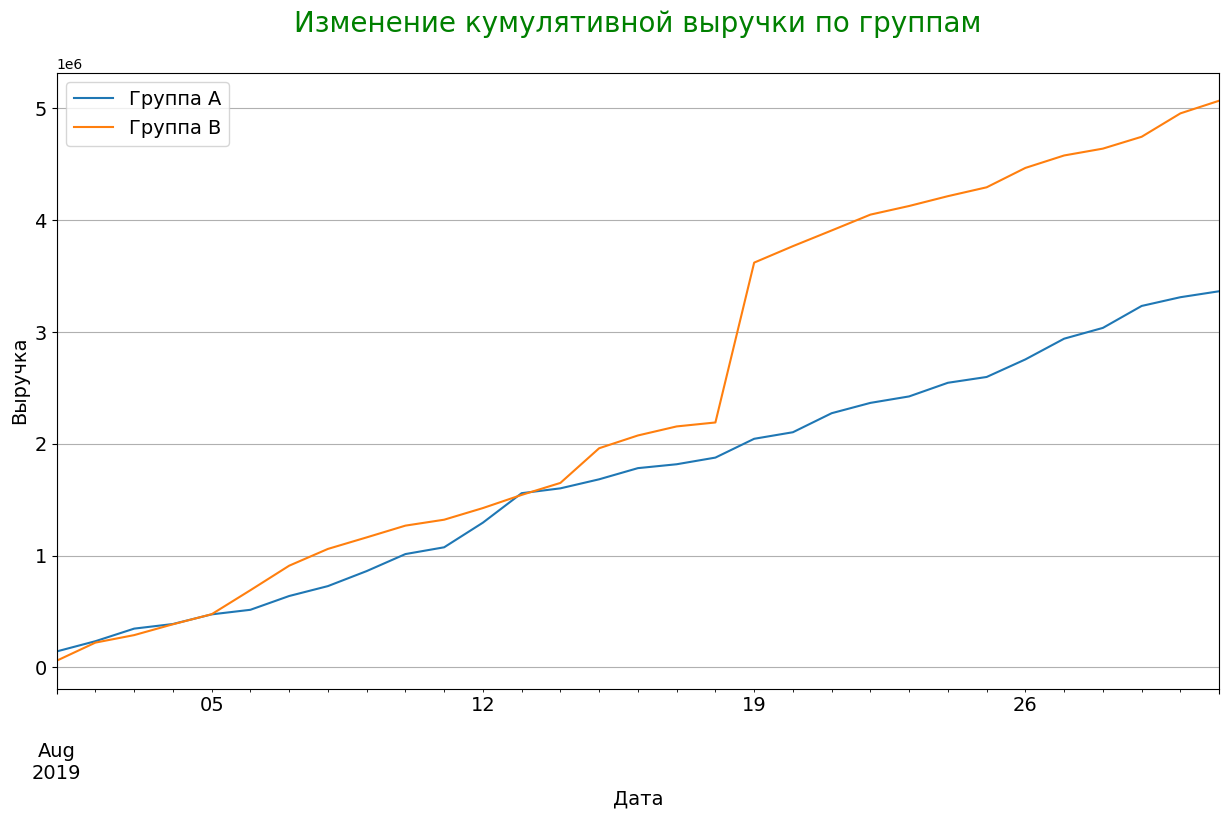

In [18]:
cum_total_revenue.plot(x='date', y=['revenue_a', 'revenue_b'], figsize=(15,8), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.title('Изменение кумулятивной выручки по группам' + "\n", fontsize=20, color='Green')
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

**Как видно из графика, выручка в группе A растет достаточно плавно, в то время как выручка в группе B резко выросла 18-19 августа, что может быть связано с аномально большой покупкой в этот день, либо резким ростом числа заказов в этот день в этой группе. До всплеска выручка группы А и В росла равномерно и была примерно на одном уровне.**

#### 3.2 Кумулятивный средний чек по группам

Определим средние чеки в каждой тестируемой группе

In [19]:
cum_total_revenue['a_mean'] = (cum_total_revenue['revenue_a']/cum_total_revenue['orders_a'])
cum_total_revenue['b_mean'] = (cum_total_revenue['revenue_b']/cum_total_revenue['orders_b'])
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b,a_mean,b_mean
0,2019-08-01,142779,23,59758,17,6207.78,3515.18
1,2019-08-02,234381,42,221801,40,5580.50,5545.02
2,2019-08-03,346854,66,288850,54,5255.36,5349.07
3,2019-08-04,388030,77,385740,68,5039.35,5672.65
4,2019-08-05,474413,99,475648,89,4792.05,5344.36


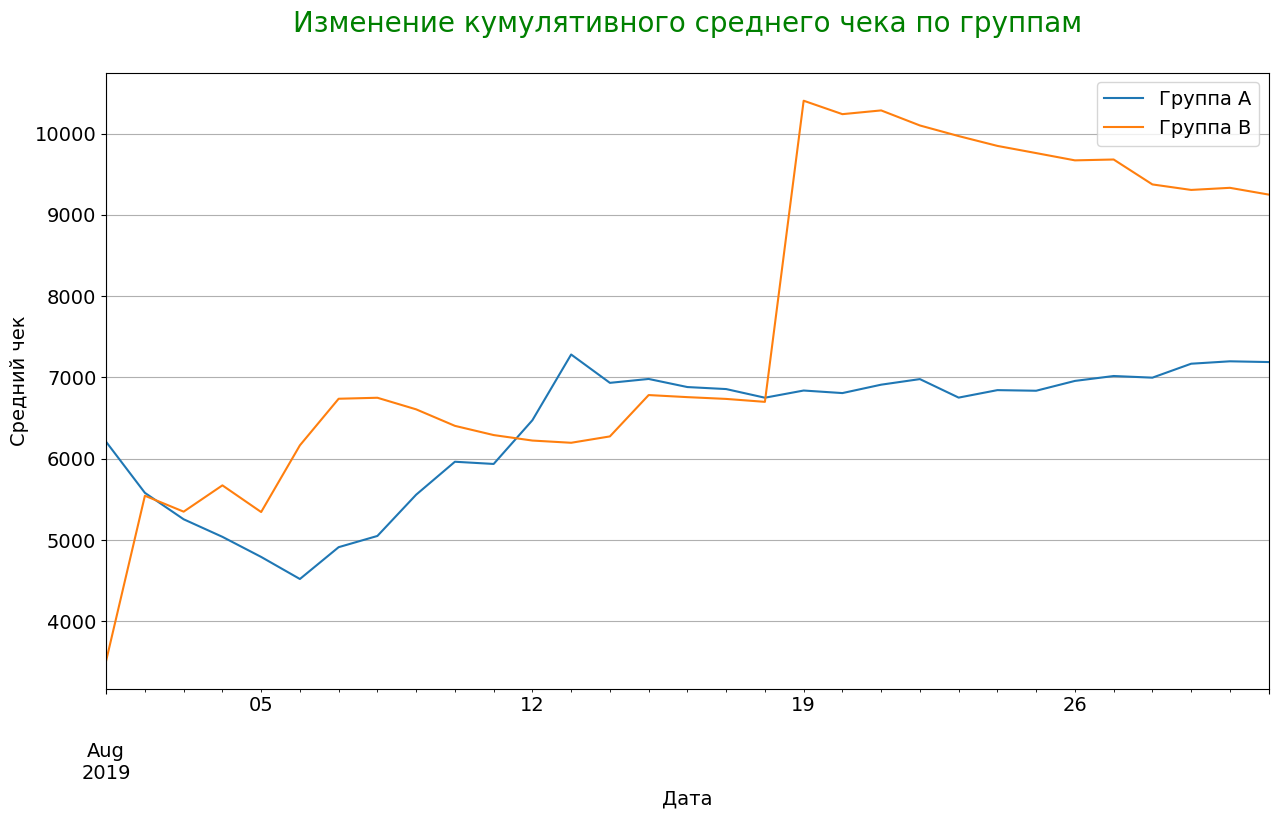

In [20]:
cum_total_revenue.plot(x='date', y=['a_mean', 'b_mean'], figsize=(15,8), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.title('Изменение кумулятивного среднего чека по группам' + "\n", fontsize=20, color='Green')
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

**Как видно из графика, в группе A размер среднего чека с 1 по 6 августа заметно снижался, после чего до 13 августа увеличивался, а затем до конца августа незначительно колебался около 7000. В группе B размер среднего чека был достаточно не стабильным на протяжении всего августа: с 1 по 4 число рос примерно от 2000 до 5500, к 7-8 августа вырос примерно до 6800, к 13 августа немного снизился, а затем 18 августа превысил 10000, после чего равномерно снижался к 9000 до конца месяца. Таким образом, можно сделать вывод, что 18 августа действительно была совершена аномально большая покупка в группе B.**

#### 3.3 Относительное изменение кумулятивного среднего чека группы B к группе A.

In [21]:
cum_total_revenue['relation'] = (cum_total_revenue['b_mean']/cum_total_revenue['a_mean'])-1
cum_total_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b,a_mean,b_mean,relation
0,2019-08-01,142779,23,59758,17,6207.78,3515.18,-0.43
1,2019-08-02,234381,42,221801,40,5580.50,5545.02,-0.01
2,2019-08-03,346854,66,288850,54,5255.36,5349.07,0.02
3,2019-08-04,388030,77,385740,68,5039.35,5672.65,0.13
4,2019-08-05,474413,99,475648,89,4792.05,5344.36,0.12


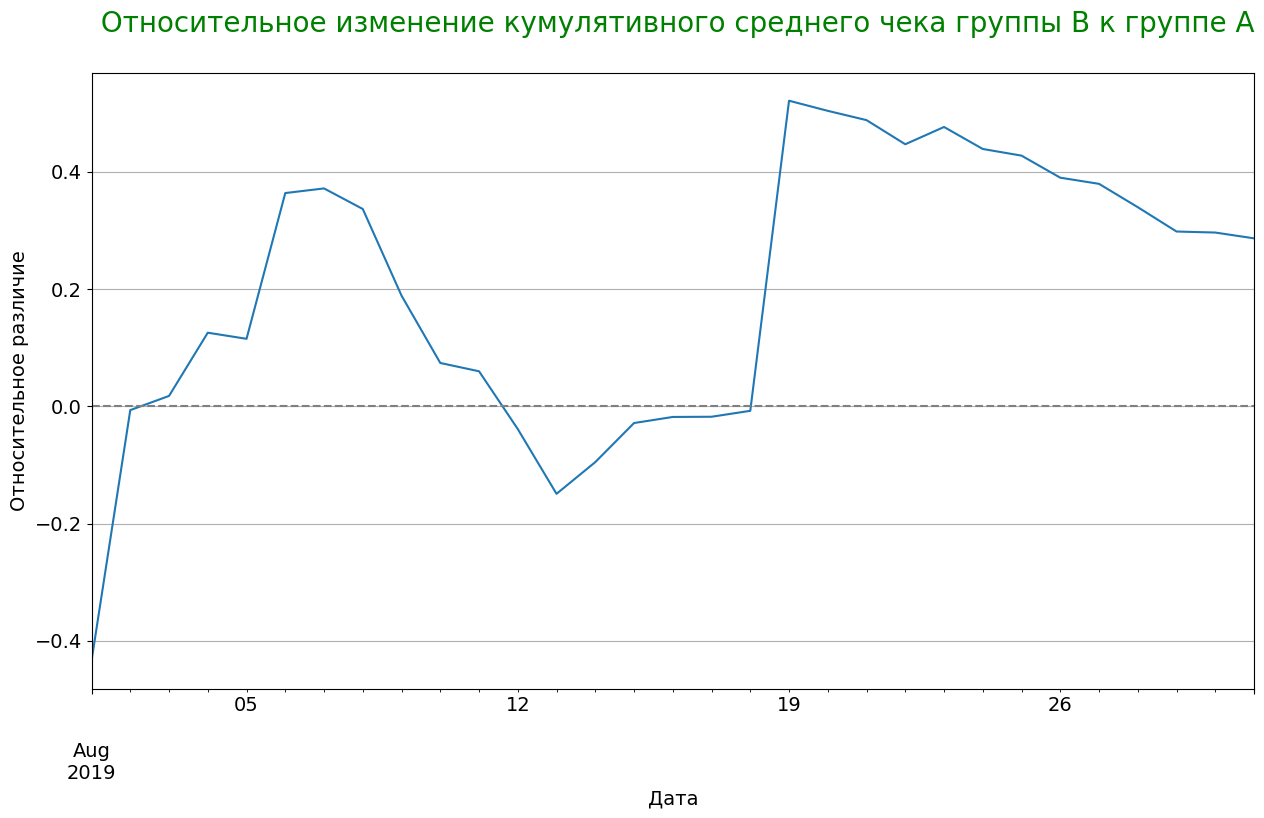

In [22]:
# cтроим отношение средних чеков
cum_total_revenue.plot(x='date', y='relation', figsize=(15,8), grid = True, fontsize=14, legend=False)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное различие', fontsize=14)
plt.title(' Относительное изменение кумулятивного среднего чека группы B к группе A' + "\n", fontsize=20, color='Green')
plt.axhline(y=0, color='grey', linestyle='--') 
plt.show()

**Относительное различие среднего чека между группами A и B значительно и резко менялось в несколько дат. Вероятно, в эти дни были соверешены большие заказы. С ними разберемся в дальнейшем.**

#### 3.4  Кумулятивное среднее количество заказов на посетителя по группам

In [23]:
# считаем кумулятивную конверсию 
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors'] 

# отделяем данные по группе A 
cumulative_data_a = cumulative_data[cumulative_data['group']=='A'][['date','conversion']] 

# отделяем данные по группе B 
cumulative_data_b = cumulative_data[cumulative_data['group']=='B'][['date','conversion']] 

# объединим данные по конверсии в одной таблице
cum_total_conversion = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date')
cum_total_conversion.columns = ['date', 'conversion_a', 'conversion_b']
cum_total_conversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.03,0.02
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


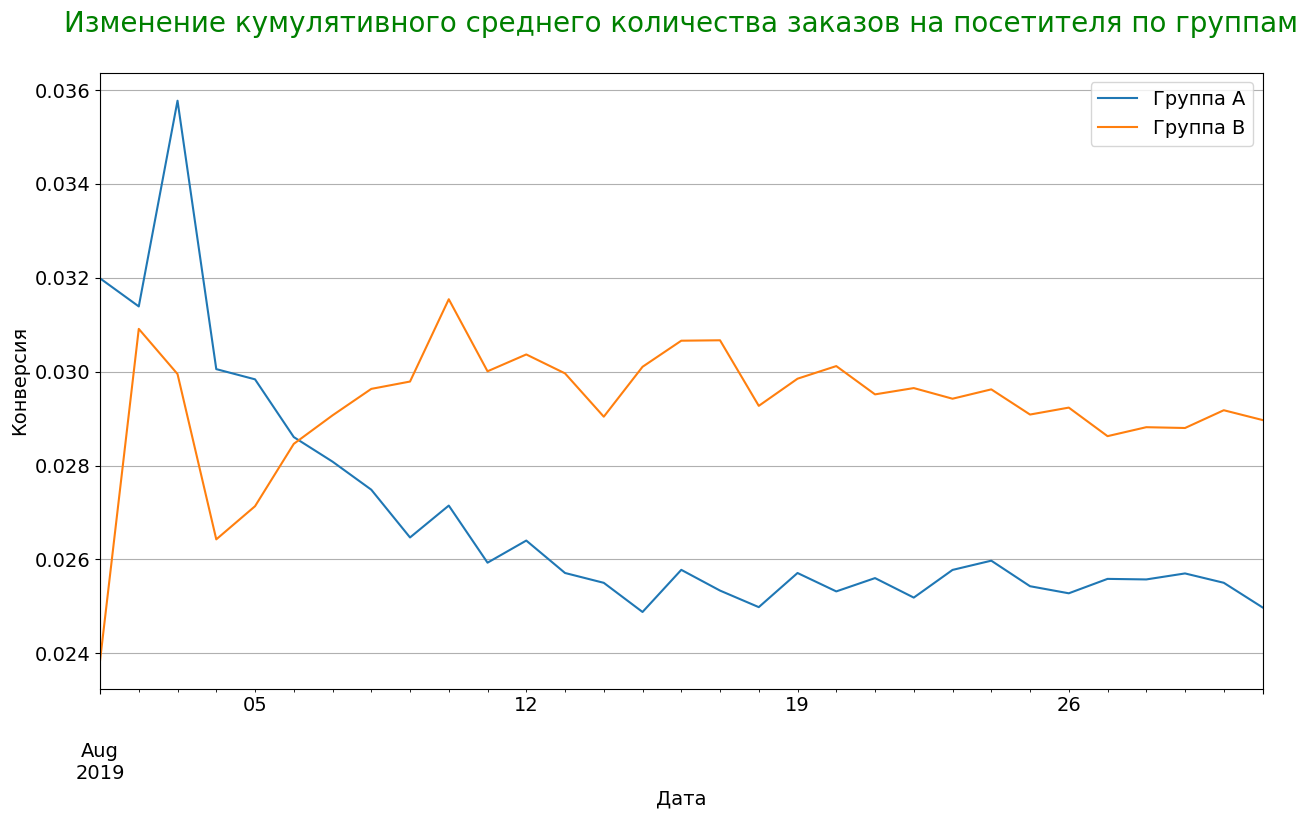

In [24]:
cum_total_conversion.plot(x='date', y=['conversion_a', 'conversion_b'], figsize=(15,8), grid = True, fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Конверсия', fontsize=14)
plt.title('Изменение кумулятивного среднего количества заказов на посетителя по группам' + "\n", fontsize=20, color='Green' )
plt.legend(['Группа A','Группа B'], fontsize=14)
plt.show()

**Как видно по графику, до 10го августа кумулятивная конверсия в обеих группах достаточно сильно колебалась, но после 10го августа в группе A конверсия практически стабилизировалась, а в группе B - еще немного колебалась, но при этом относительно равномерно снижалась до 25го августа, после чего практически стабилизировалась.
Конверсия в покупателей у группы B заметно выше, чем у группы A.**

#### 3.5 Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [25]:
#посчитаем относительное изменение
cum_total_conversion['relation'] = (cum_total_conversion['conversion_b']/cum_total_conversion['conversion_a'])-1
cum_total_conversion.head()

,date,conversion_a,conversion_b,relation
0,2019-08-01,0.03,0.02,-0.25
1,2019-08-02,0.03,0.03,-0.02
2,2019-08-03,0.04,0.03,-0.16
3,2019-08-04,0.03,0.03,-0.12
4,2019-08-05,0.03,0.03,-0.09


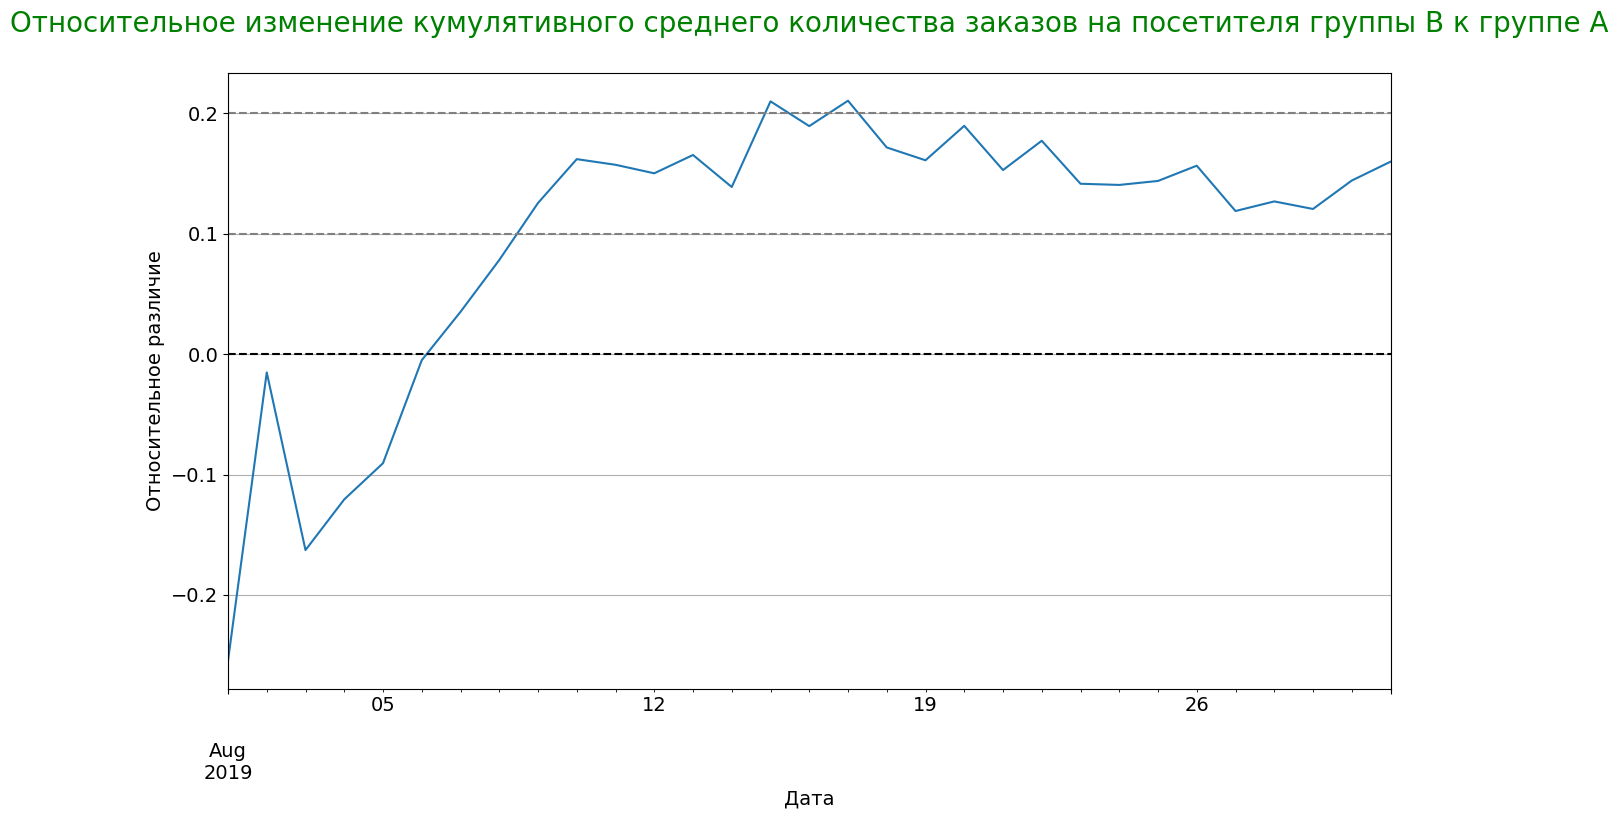

In [26]:
cum_total_conversion.plot(x='date', y='relation', figsize=(15,8), grid = True, fontsize=14, legend=False)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное различие', fontsize=14)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A'+ "\n", fontsize=20, color='Green')
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--') 
plt.axhline(y=0.2, color='grey', linestyle='--') 
plt.show()

**Как видно по графику, только до 6 августа кумулятивная конверсия в группе A была выше кумулятивной конверсии в группе B. После 22 августа относительное кумулятивного среднего количества заказов на посетителя становится достаточно стабильным.
В целом отношение конверсий почти стабилизировалось - причем группа A проигрывает группе B на протяжении почти всего теста, но делать какие-либо выводы по тесту еще рано.**


<font color='green'>**Вывод**</font>

**Анализ графиков кумулятивных метрик (среднего чека, конверсии) позволяет предположить, что среди заказов в группе B есть экстремально большие, которые сильно влияют на прирост среднего чека. Конверсия в группах к концу теста стабилизировалась, причем в группе В она выше.**

<a id='stage_3_2'></a>
### Анализ выбросов

#### 3.6 Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям

In [27]:
orders_by_users = orders.groupby('visitor_id', as_index = False).agg({'transaction_id': 'nunique'})
orders_by_users.sort_values(by='transaction_id', ascending=False).head(10)

,visitor_id,transaction_id
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


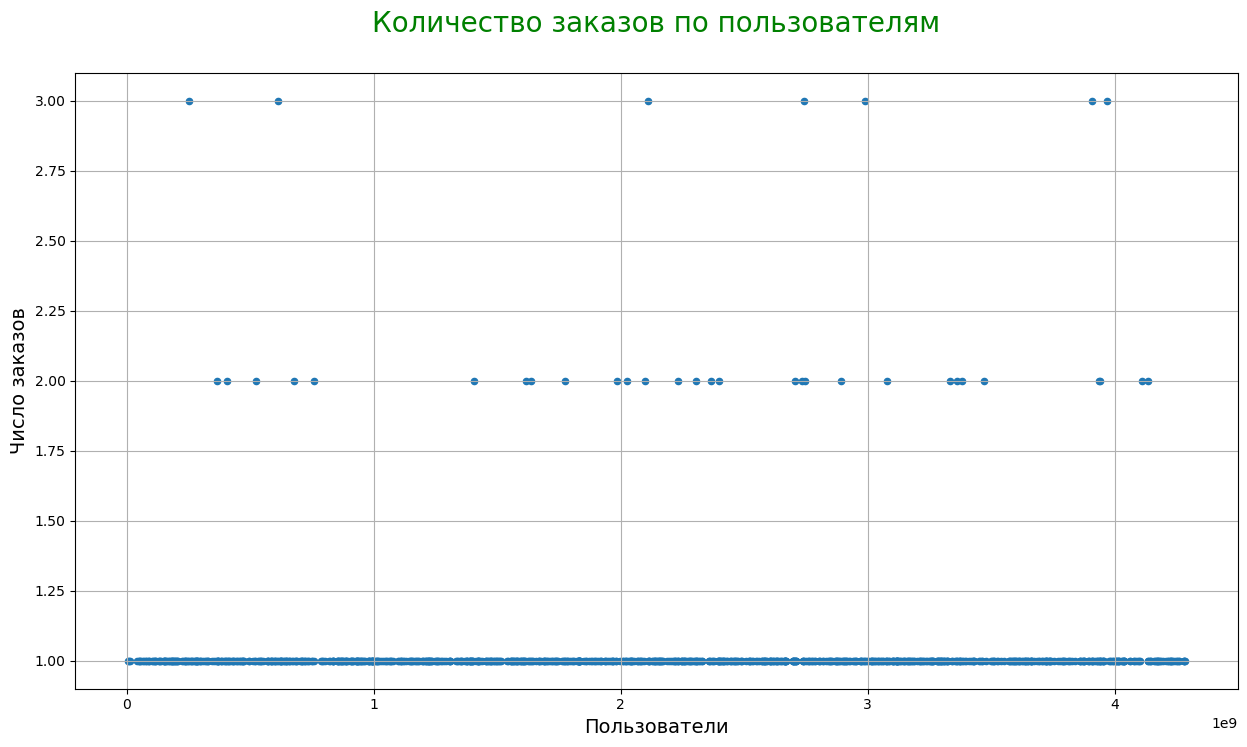

In [28]:
orders_by_users.plot(x='visitor_id', y='transaction_id', kind='scatter', grid=True, figsize=(15,8))
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Число заказов', fontsize=14)
plt.title('Количество заказов по пользователям' + "\n", fontsize=20, color='Green' )
plt.show()

 **Большинство пользователей сделали 1 заказ, некоторые - 2, и всего 7 человек - 3 заказа.**

#### 3.7 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя для определения "границы аномальности"

In [29]:
np.percentile(orders_by_users['transaction_id'], [95, 99])

array([1., 2.])

Менее 1% пользователей совершили от 2 заказов и больше.

Менее 5% пользователей совершили больше 1 заказа.

**Таким образом будем считать, что следует отсеять как аномальных пользователей с 2 и 3 заказами.**

#### 3.8 Точечный график стоимостей заказов

Посмотрим на информацию о стоимостях заказов

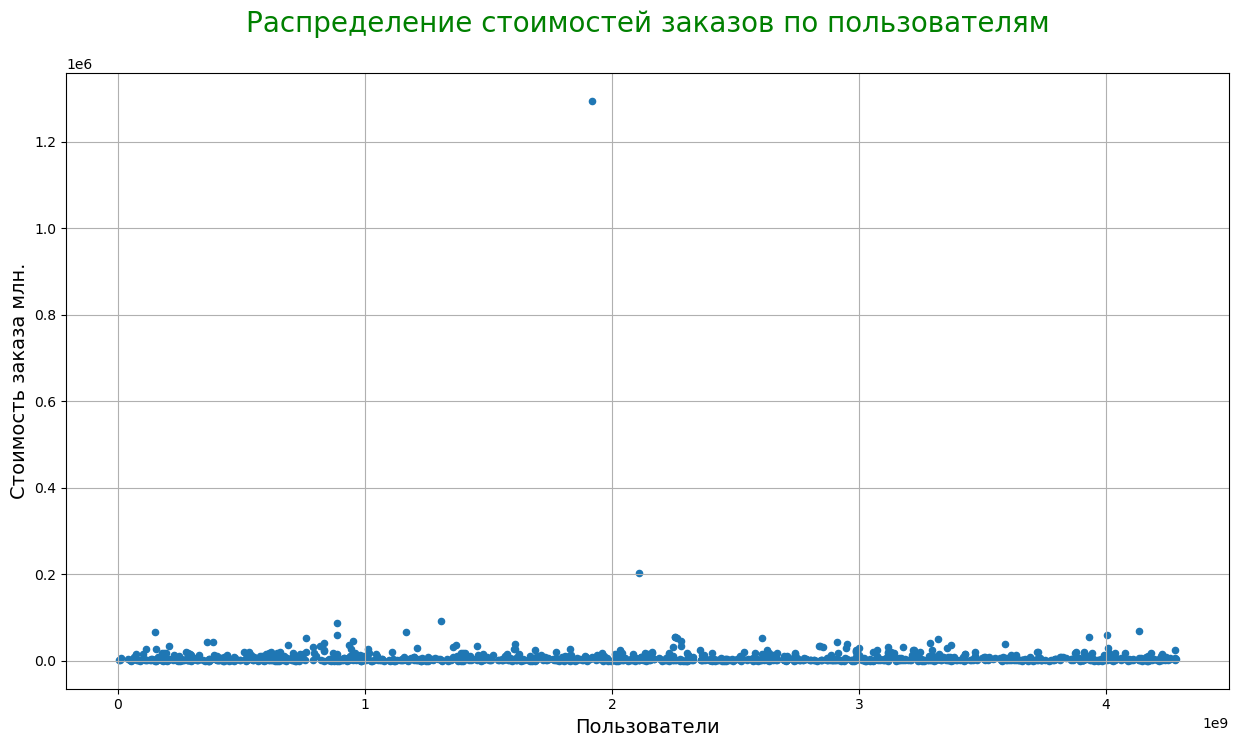

In [30]:
orders.plot(x='visitor_id', y='revenue', kind='scatter', grid=True, figsize=(15,8))
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Стоимость заказа млн.', fontsize=14)
plt.title('Распределение стоимостей заказов по пользователям' + "\n", fontsize=20, color='Green')
plt.show()

Мы имеем следующие наиболее заметные выбросы:
- Превышающий 1,2 млн;
- Около 200000

Рассмотрим график в увеличенном масштабе

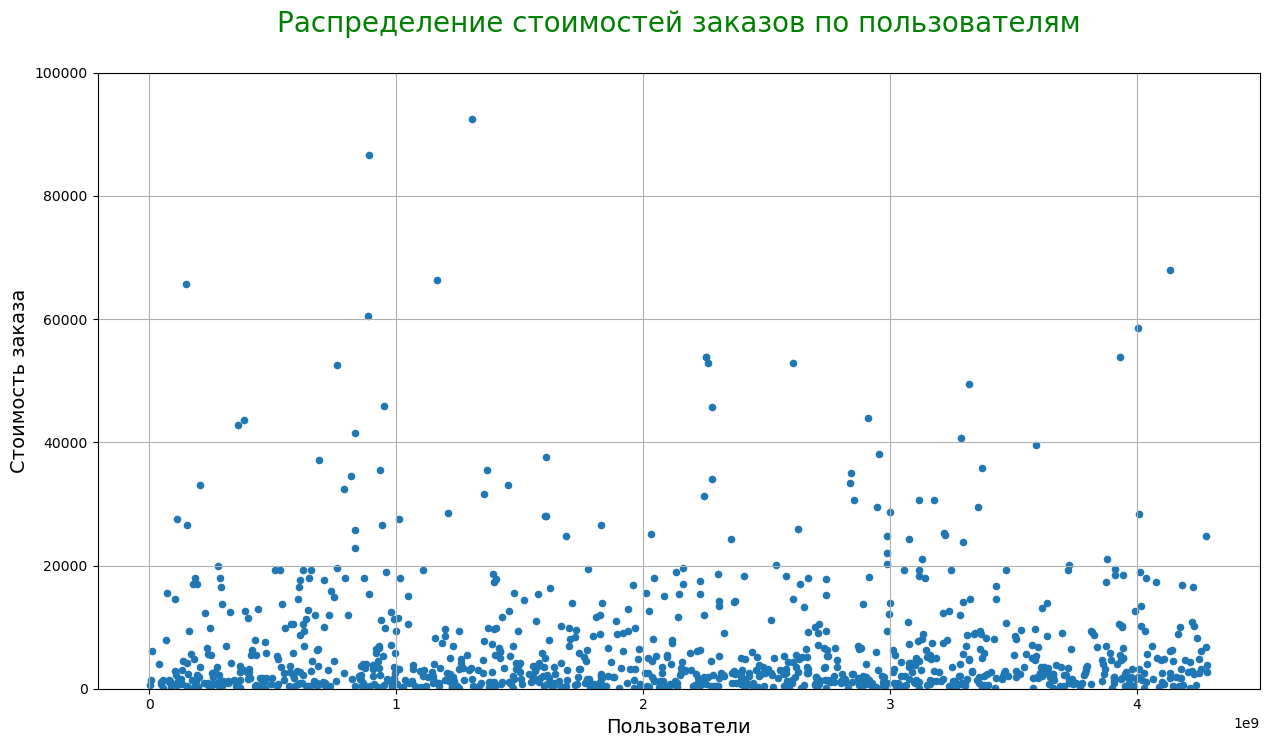

In [31]:
orders.plot(x='visitor_id', y='revenue', kind='scatter', grid=True, figsize=(15,8))
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=14)
plt.title('Распределение стоимостей заказов по пользователям'+ "\n", fontsize=20, color='Green')
plt.ylim(0,100000)
plt.show()

**При более подробном рассмотрении можно отметить, что основная часть заказов по стоимости не превышает 20000.**

На следующем шаге определим "границу аномальности стоимости заказа".

#### 3.9 95-й и 99-й перцентили стоимости заказов на пользователя

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Менее 1% пользователей совершили заказ, стоимость которого превышает 53904.

Менее 5% пользователей совершили заказ, стоимость которого больше 26785.

**Таким образом будем считать, что стоимость заказа больше 27000 является аномальной.**





<a id='stage_3_3'></a>
### **Cтатистическая значимость различий** 

На этом шаге и последующих для определения статистической значимости различий в конверсии или в среднем чеке заказа между группами будет использоваться Непараметрический тест Уилкоксона-Манна-Уитни, поскольку в представленных данных имеются выбросы, а данный тест использует ранжирование значений. Так как наши гипотезы двусторонние, для корректной работы метода укажем параметр alternative = 'two-sided'

Соберем все необходимые данные для анализа:

In [33]:
visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']] 
visitors_a.columns = ['date', 'visitors_a'] 

visitors_a_cummulative = visitors_a.apply( 
    lambda x: visitors_a[visitors_a['date'] <= x['date']].agg( 
        {'date': 'max', 'visitors_a': 'sum'} 
    ), 
    axis=1, 
) 
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a'] 

visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']] 
visitors_b.columns = ['date', 'visitors_b'] 

visitors_b_cummulative = visitors_b.apply( 
    lambda x: visitors_b[visitors_b['date'] <= x['date']].agg( 
        {'date': 'max', 'visitors_b': 'sum'} 
    ), 
    axis=1, 
) 
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b'] 

orders_a = ( 
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']] 
    .groupby('date', as_index=False) 
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}) 
) 
orders_a.columns = ['date', 'orders_a', 'revenue_a'] 

orders_a_cummulative = orders_a.apply( 
    lambda x: orders_a[orders_a['date'] <= x['date']].agg( 
        {'date': 'max', 'orders_a': 'sum', 'revenue_a': 'sum'} 
    ), 
    axis=1, 
).sort_values(by=['date']) 

orders_a_cummulative.columns = [ 
    'date', 
    'orders_cummulative_a', 
    'revenue_cummulative_a', 
] 

orders_b = ( 
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']] 
    .groupby('date', as_index=False) 
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}) 
) 
orders_b.columns = ['date', 'orders_b', 'revenue_b'] 

orders_b_cummulative = orders_b.apply( 
    lambda x: orders_b[orders_b['date'] <= x['date']].agg( 
        {'date': 'max', 'orders_b': 'sum', 'revenue_b': 'sum'} 
    ), 
    axis=1, 
).sort_values(by=['date']) 

orders_b_cummulative.columns = [ 
    'date', 
    'orders_cummulative_b', 
    'revenue_cummulative_b', 
] 

data = (
    orders_a.merge( 
        orders_b, left_on='date', right_on='date', how='left' 
    ) 
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left') 
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left') 
    .merge(visitors_a, left_on='date', right_on='date', how='left') 
    .merge(visitors_b, left_on='date', right_on='date', how='left') 
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left') 
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left') 
) 

data.head()

,date,orders_a,revenue_a,orders_b,revenue_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_a,visitors_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [34]:
#создаем переменные, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов  
orders_visitors_a = ( 
    orders[orders['group'] == 'A'] 
    .groupby('visitor_id', as_index=False) 
    .agg({'transaction_id': pd.Series.nunique}) 
) 
orders_visitors_a.columns = ['user_id', 'orders'] 

orders_visitors_b = ( 
    orders[orders['group'] == 'B'] 
    .groupby('visitor_id', as_index=False) 
    .agg({'transaction_id': pd.Series.nunique}) 

) 
orders_visitors_b.columns = ['user_id', 'orders']  


#создаем переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, 
#а пользователям без заказов — нули
sample_a = pd.concat( 
    [orders_visitors_a['orders'],pd.Series( 
        0, index=np.arange(data['visitors_a'].sum() - len(orders_visitors_a['orders'])), name='orders'
    )],axis=0 
) 

sample_b = pd.concat( 
    [orders_visitors_b['orders'],pd.Series(
        0, index=np.arange(data['visitors_b'].sum() - len(orders_visitors_b['orders'])), name='orders'
    )],axis=0 
) 

#### 3.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным

Сформулируем нулевую и альтернативную гипотезы:

- H0 - конверсии в группах А и В по "сырым" данным равны;
- H1 - конверсии в группах А и В по "сырым" данным отличаются.

Порог статистической значимости alpha примем за 5%.

In [35]:
alpha = 0.05
p_value_conversion = stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')[1]
print('p-value по "сырым" данным равно', "{0:.3f}".format(p_value_conversion))
if (p_value_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "сырым" данным равно 0.011
Отвергаем нулевую гипотезу


In [36]:
relative_increase_conversion = sample_b.mean() / sample_a.mean() - 1
print("Относительный прирост конверсии группы B: {0:.3f}".format(relative_increase_conversion))

Относительный прирост конверсии группы B: 0.160


**P-value по "сырым" данным меньше 5 %, поэтому отвергаем нулевую гипотезу о том, что среднее количество заказов на посетителя в группах А и В по "сырым" данным равно. Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы А равен 16%.**

#### 3.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным.

Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние чеки в группах А и В по "сырым" данным равны;
- H1 - средние чеки в группах А и В по "сырым" данным отличаются.

Порог статистической значимости alpha примем за 5%.

In [37]:
alpha = 0.05
p_value_average_check = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'], 
                             alternative = 'two-sided')[1]
print('p-value по "сырым" данным равно', "{0:.3f}".format(p_value_average_check))
if (p_value_average_check < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "сырым" данным равно 0.829
Не получилось отвергнуть нулевую гипотезу


In [38]:
relative_increase_average_check = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1

print('Относительный прирост среднего чека группы B: {:.2f}'
      .format(relative_increase_average_check))

Относительный прирост среднего чека группы B: 0.29


**P-value по "сырым" данным значительно больше 5 %, поэтому нулевую гипотезу о том, что средние чеки в группах А и В по "сырым" данным равны, отвергнуть не можем. Статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет. Относительная зависимость среднего чека группы B от группы A по «сырым» данным 29%.**

#### 3.12 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Ранее (пункт 3.7 и 3.9) мы приняли за аномальных пользователей тех, кто совершил более 1 заказа или совершил заказ дороже 27000 рублей.

Узнаем, сколько всего аномальных пользователей.

In [39]:
# пользователи с несколькими заказами
users_with_many_orders = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
users_with_many_orders = users_with_many_orders[users_with_many_orders['transaction_id'] > np.percentile(orders_by_users['transaction_id'], 95)]['visitor_id']

# пользователи с дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id'].reset_index(drop=True)

#объединим их в таблице, удалим дубликаты, отсортируем по возрастанию.
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head())
len(abnormal_users)

20    113298937
44    148427295
37    204675465
55    249864742
25    358944393
Name: visitor_id, dtype: int64


86

Всего таких пользователей 86. Узнаем, как их действия повлияли на результаты теста.

Создадим переменные, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [40]:
sample_a_filtered = pd.concat(
    [orders_visitors_a[
            np.logical_not(orders_visitors_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_a'].sum() - len(orders_visitors_a['orders'])
            ),name='orders',),],axis=0,
)

sample_b_filtered = pd.concat(
    [orders_visitors_b[
            np.logical_not(orders_visitors_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_b'].sum() - len(orders_visitors_b['orders'])
            ),name='orders',),],axis=0,
) 

Посчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным

Сформулируем нулевую и альтернативную гипотезы:

- H0 - конверсии в группах А и В по "очищенным" данным равны;
- H1 - конверсии в группах А и В по "очищенным" данным отличаются.

Порог статистической значимости alpha примем за 5%.

In [41]:
alpha = 0.05
p_value_conversion_filtered = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative = 'two-sided')[1]
print('p-value по "очищенным" данным равно', "{0:.3f}".format(p_value_conversion_filtered))
if (p_value_conversion_filtered < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "очищенным" данным равно 0.016
Отвергаем нулевую гипотезу


In [42]:
relative_increase_conversion_filtered = sample_b_filtered.mean()/sample_a_filtered.mean()-1

print('Относительный прирост конверсии группы B к конверсии группы А после очистки данных: {:.2f}'
      .format(relative_increase_conversion_filtered))

Относительный прирост конверсии группы B к конверсии группы А после очистки данных: 0.17


**P-value по "очищенным" данным меньше 5 %, поэтому отвергаем нулевую гипотезу о том, что среднее количество заказов на посетителя в группах А и В по "очищенным" данным равно. Как и в случае с сырыми данными, анализ очищенных данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии очищенной группы B к А увеличился на 1% и равен 17%.**

#### 3.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [43]:
#отфильтруем аномальных пользователей
sample_a_filtered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

sample_b_filtered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние чеки в группах А и В по "очищенным" данным равны;
- H1 - средние чеки в группах А и В по "очищенным" данным отличаются.

Порог статистической значимости alpha примем за 5%

In [44]:
alpha = 0.05
p_value_average_check_filtered=(stats.mannwhitneyu(
    sample_a_filtered_revenue, 
    sample_b_filtered_revenue, 
    alternative = 'two-sided')[1])
print('p-value по "очищенным" данным равно', "{0:.3f}".format(p_value_average_check_filtered))
if (p_value_average_check_filtered < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value по "очищенным" данным равно 0.727
Не получилось отвергнуть нулевую гипотезу


In [45]:
relative_increase_average_check_filtered = sample_b_filtered_revenue.mean()/sample_a_filtered_revenue.mean()-1

print('Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: {:.2f}'
      .format(relative_increase_average_check_filtered))

Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -0.03


**P-value немного уменьшился, но остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет. Статистической значимости различия между средними чеками не появилось. А вот средний чек группы B без выбросов стал ниже среднего чека группы A.**

<font color='green'>**Вывод**</font>

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.**
- Как по сырым, так и по очищенным от аномалий данным нет статистически значимого различия по среднему чеку между группами.**
- График различия конверсии между группами показывает, что результаты группы B лучше группы A, что так же подтверждается тем, что относительный прирост конверсии очищенной группы B к А увеличился на 1%
- График различия среднего чека до очистки был переменчив, именно благодаря ему мы и нашли аномалии. После очистки узнали что относительный прирост среднего чека группы B к среднему чеку группы А значительно уменьшился и значимых различий между средними чеками в разных группах нет

**В целом тест можно остановить. Мы увидели прирост конверсии в группе B, но на среднем чеке проверяемая гипотеза не сказалась.**

<a id='stage_4'></a>
## **Этап 4. Общий вывод**

**В ходе проделанной работы был выполнен маркетинговый анализ интернет-магазина. Анализ разделился на два основных этапа:**
1. Приоритизация гипотез
2. Анализ А/В теста


**В первом этапе были приоритизированы гипотезы с помощью фреймворков ICE и RICE. Было принято решение наиболее приоритетным выделить метод RICE (влияние, уверенность, усилия, охват), так как он включает в себя параметр reach (как много пользователей затронет гипотеза).** 

**Список в порядке приоретизации RICE:**

In [46]:
hypothesis.sort_values('RICE', ascending=False)['hypothesis'].reset_index()

,index,hypothesis
0,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
1,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
2,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
4,8,"Запустить акцию, дающую скидку на товар в день рождения"
5,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
6,1,"Запустить собственную службу доставки, что сократит срок доставки заказов"
7,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Во второй части проекта выполнен анализ результатов AB-теста, который был проведен с целью увеличения выручки.**

**1. Изучили входные данные**
- Выявили, что 58 пользователей попали в обе группы. 
- Исключили их из исследования, так как неизвестно, какая из версий исследуемой страницы повлияла на их решения

**2. Изучили куммулятивные метрики**
- Анализ графиков кумулятивных метрик (среднего чека, конверсии) позволил сделать вывод, что среди заказов в группе B есть аномально большие, которые сильно влияют на прирост среднего чека. 
- Конверсия в покупателей у группы B заметно выше, чем у группы A.

**3. Провели Анализ выбросов**
- Большинство пользователей сделали 1 заказ, некоторые - 2, и всего 7 человек - 3 заказа.
- Выявили тот самый аномальный заказ, превышающий 1,2 млн, когда основная часть заказов находится на уровне 200 тыс.
- Таким образом при помощи вычислений определили, что аномальной зоной будем считать пользователей, которые совершили более одного заказа и стоимостью более 27 тыс.

**4. Изучили статистическую значимость различий в среднем чеке и конверсии по «сырым» и «очищенным» данным.**
- Анализ и сырых и очищенных данных показал, что в конверсии между группами есть статистически значимые различия. 
- Относительный прирост конверсии группы В после очистки данных увеличился на 1% и составляет 17%
- Что же касается различий в среднем чеке заказа, то статистически значимые различия ни в сырых ни в очищенных данных не подтвердились. 
- Средний чек группы B без выбросов стал ниже среднего чека группы A, относительный прирост уменьшился с 29% до -0,03% 

**Тест был проведен с целью увеличения выручки, но на среднем чеке проверяемая гипотеза не сказалась. Поэтому не смотря на рост конверсии группы В было принято решение остановить тест и признать его неуспешным, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A очень низкая.**
